#Breast Cancer detection using Neural network

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Dataset Overview

- The Breast Cancer Wisconsin dataset is loaded from `sklearn.datasets`.
- It contains 569 samples and 30 numerical features extracted from digitized images of breast mass.
- The target is binary:  
  - `0 = malignant` (cancerous)  
  - `1 = benign` (non-cancerous)

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
print("dataset shape\n")
print(X.shape)
print("features names: \n")
print(data.feature_names)
print("Target names : \n")
print(data.target_names)

dataset shape

(569, 30)
features names: 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names : 

['malignant' 'benign']


### Convert to DataFrame

The dataset is converted to a Pandas DataFrame for easy analysis and visualization.
 Initial rows and data types are checked, and statistical summary is reviewed.


In [4]:

X_df = pd.DataFrame(X, columns=data.feature_names)
print("few rows of the dataset")
print(X_df.head())

few rows of the dataset
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst p

In [5]:
print("datatypes \n")
X_df.dtypes
print("data info : \n")
X_df.info()
print("Statistical summary of the data :\n")
X_df.describe()

datatypes 

data info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Missing Values

The dataset is checked for missing values.

In [6]:
# checking for missing values
X_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


 Result: No missing data

### Target Encoding

The target labels are added as a column named `diagnosis` and encoded using `LabelEncoder` to prepare for modeling.


In [7]:
X_df['diagnosis'] = y


print(X_df['diagnosis'].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64


In the Breast Cancer Wisconsin dataset:

**0** = malignant (cancerous)

**1** = benign (non-cancerous)

In [8]:
# encoding the target column
label_encode = LabelEncoder()

labels = label_encode.fit_transform(X_df['diagnosis'])

X_df['target'] = labels



#Data Visualization

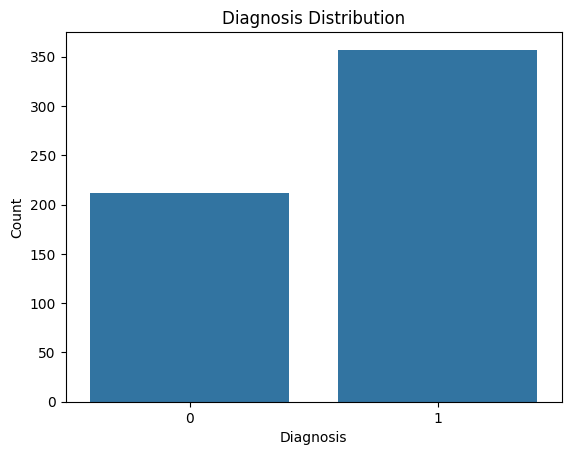

In [9]:
# countplot for the target column for checking the distribution of target

sns.countplot(x='diagnosis', data=X_df)
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### Class Balance

A countplot shows the distribution of benign vs malignant cases.  
🟦 Benign (1) cases are more frequent than 🟥 Malignant (0) cases -->**class imbalance** is present.


In [10]:
# this is how we can get all the column names of the dataframe
for column in X_df.columns:
  print(column)


mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
diagnosis
target


### Distribution Plots

Histograms with KDE plots are generated for multiple features.  



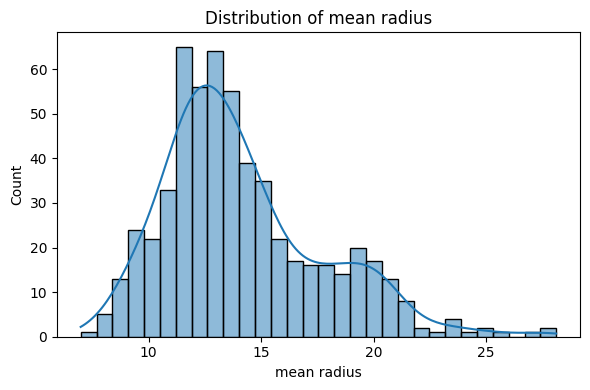

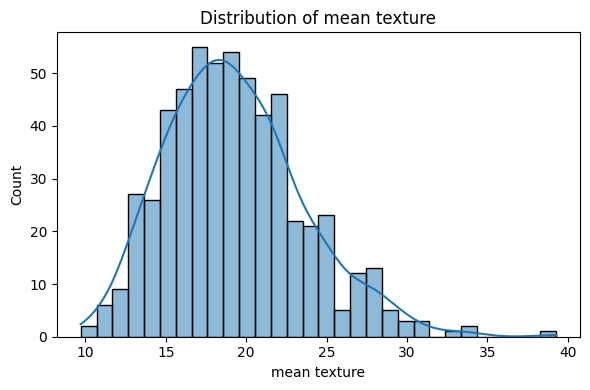

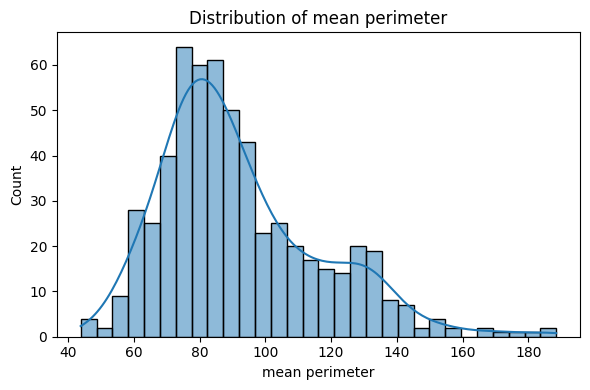

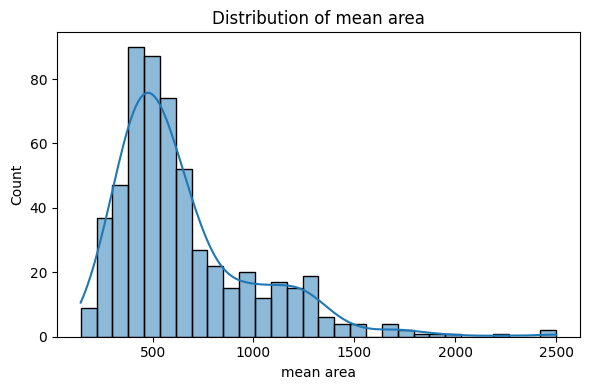

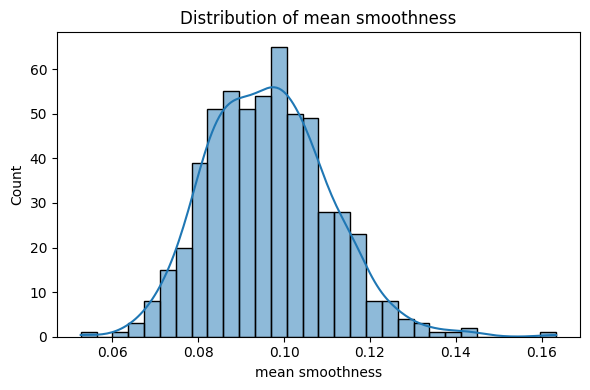

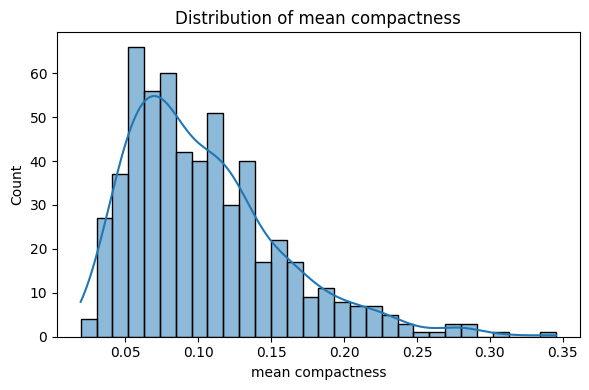

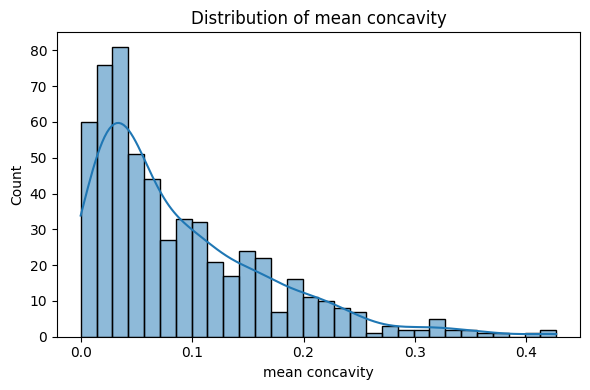

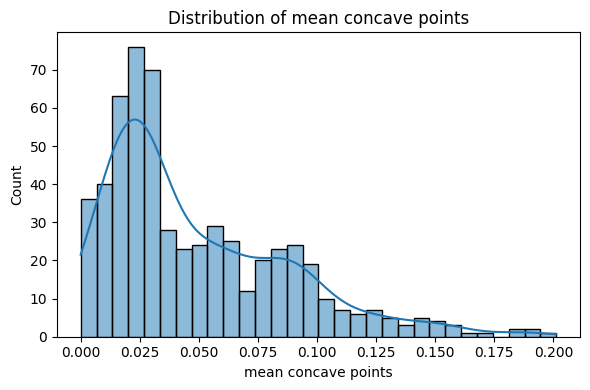

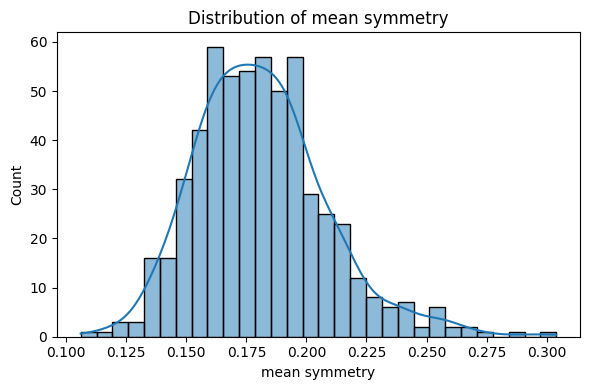

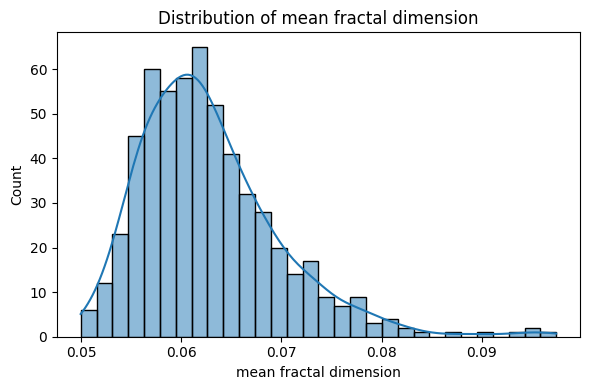

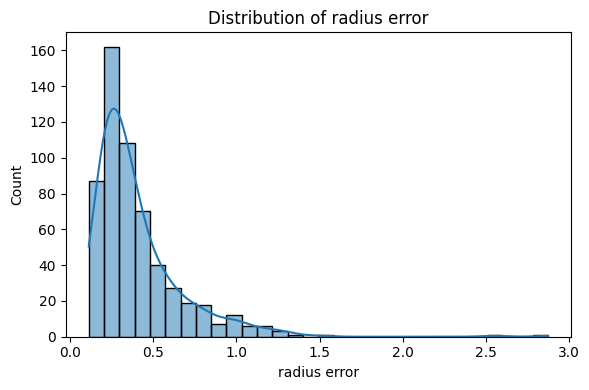

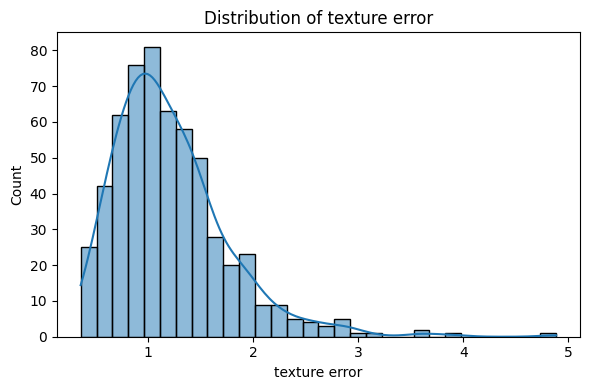

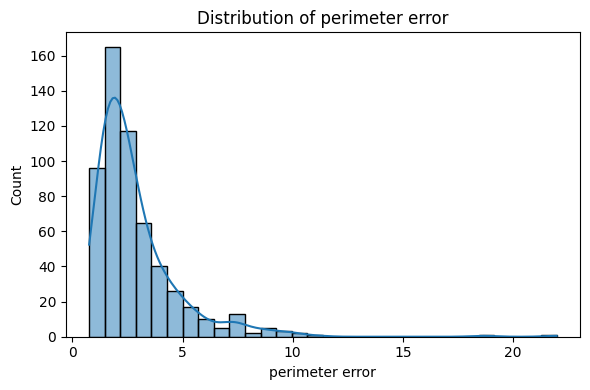

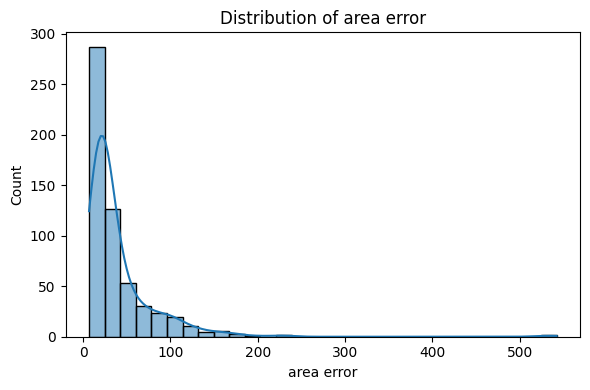

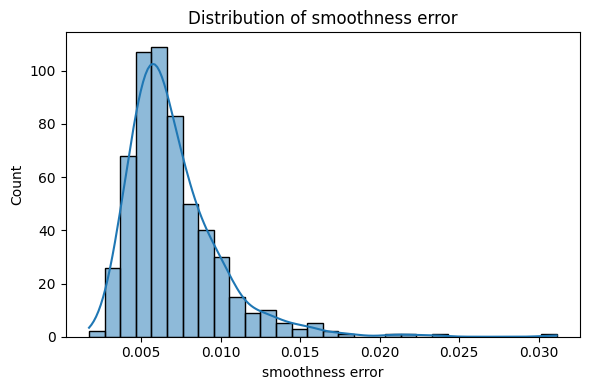

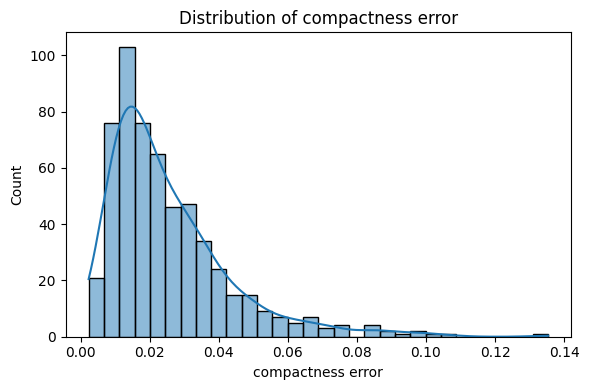

In [11]:
# creating a for loop to get the distribution plot for all columns
for column in X_df.columns[:16]:  # You can increase the range
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X_df, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Features like mean radius, mean area, and worst area show right-skewed distributions — common in medical data

###  Correlation with Diagnosis

The top 10 features most correlated with the diagnosis (target) are identified.  
These features are expected to carry the strongest signal for classification.



In [12]:
# Get correlation of all features with the target
correlations = X_df.corr(numeric_only=True)['diagnosis'].drop('diagnosis')  # exclude self-correlation

# Sort features by absolute correlation
top_features = correlations.abs().sort_values(ascending=False)

# Print top N features
print("Top correlated features with diagnosis:")
print(top_features.head(10))

Top correlated features with diagnosis:
target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
Name: diagnosis, dtype: float64


A heatmap shows how all features correlate — strong correlations exist between related geometric features.

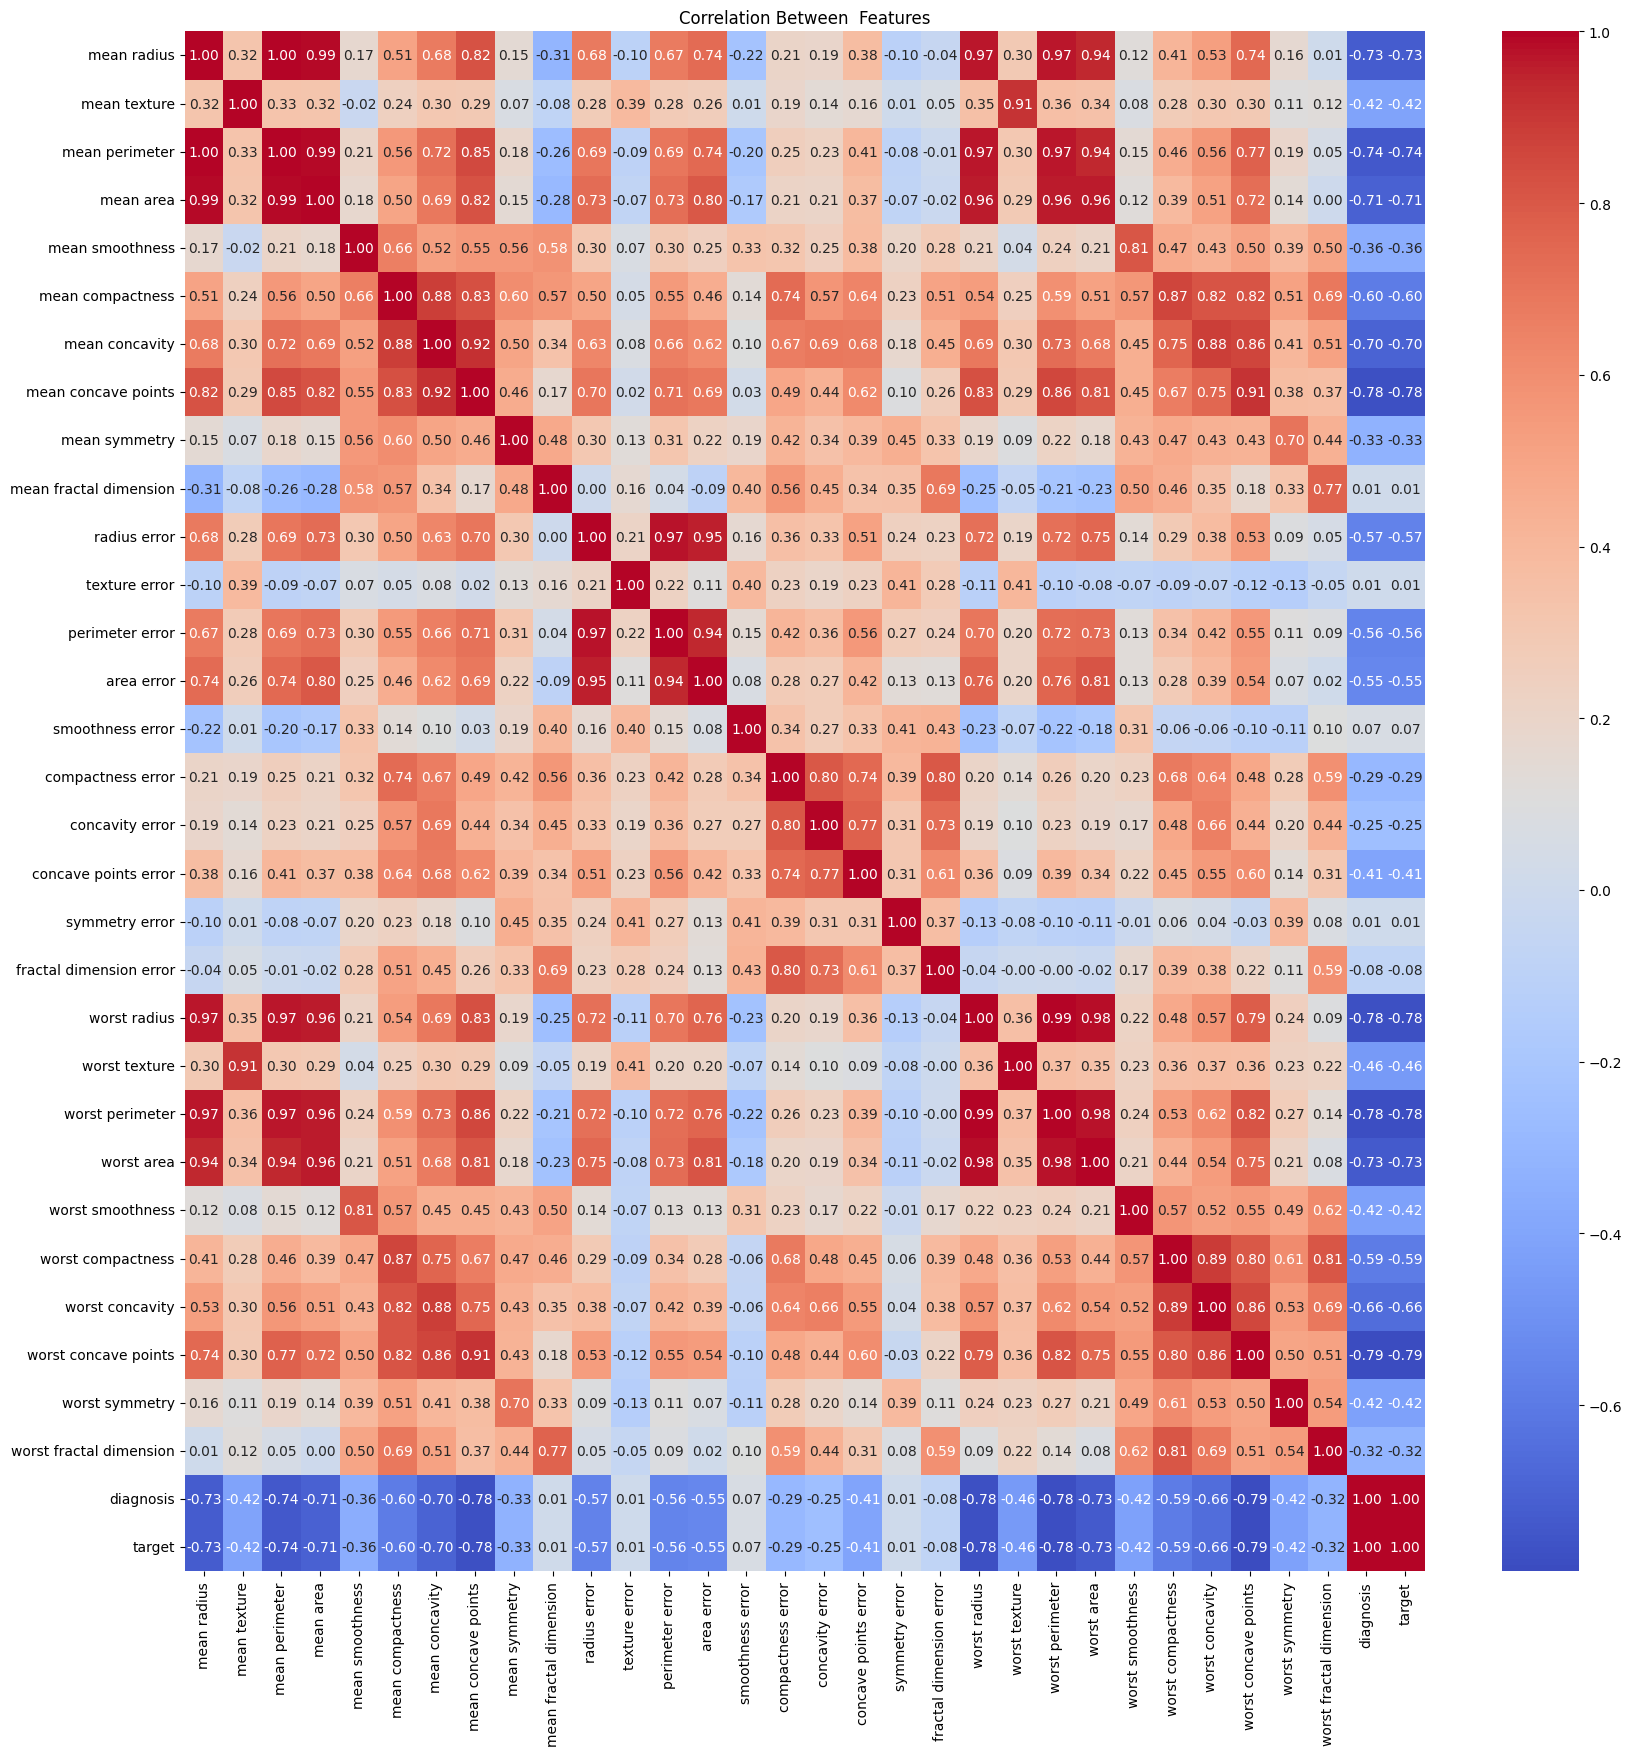

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap( X_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between  Features")
plt.show()

###Pair Plot of Top Features

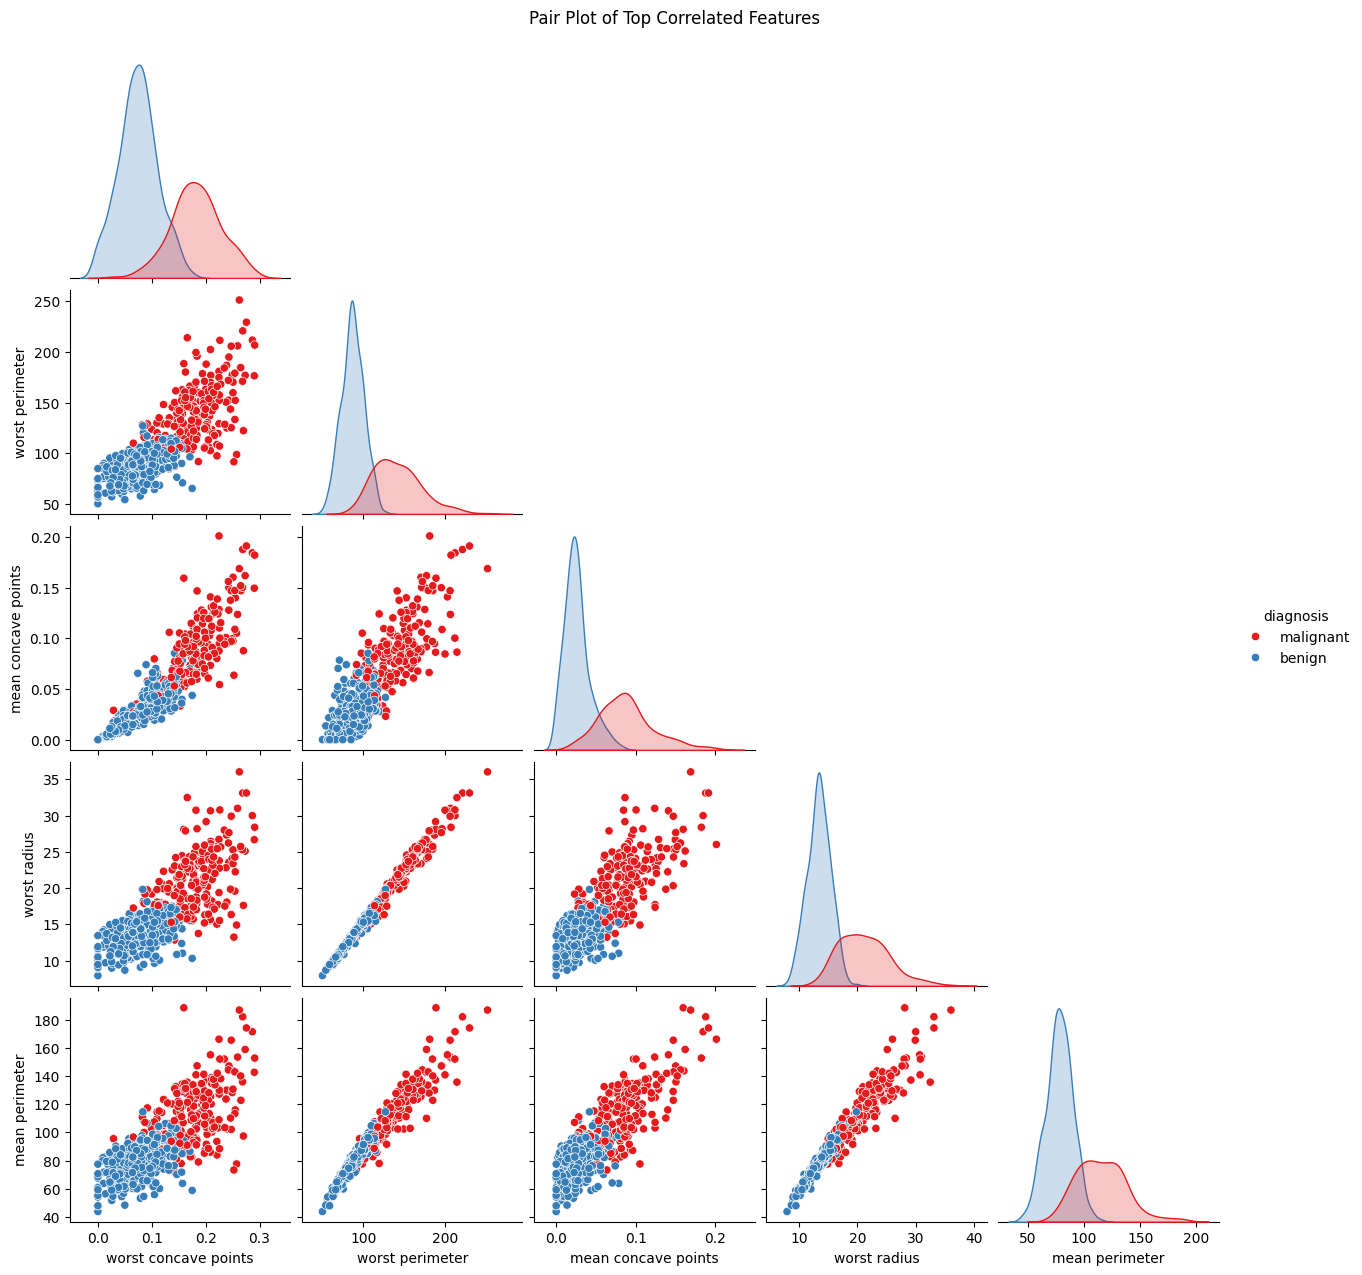

In [14]:
top_features = [
    'worst concave points',
    'worst perimeter',
    'mean concave points',
    'worst radius',
    'mean perimeter'
]

# Make sure the target is readable
X_df['diagnosis'] = X_df['diagnosis'].map({0: 'malignant', 1: 'benign'})

sns.pairplot(X_df[top_features + ['diagnosis']], hue='diagnosis', palette='Set1', corner=True)
plt.suptitle("Pair Plot of Top Correlated Features", y=1.02)
plt.show()

### 📊 Pair Plot Analysis of Top Correlated Features

This pair plot visualizes the relationships between the most strongly correlated features and the target variable (`diagnosis`: benign vs. malignant).

**Key observations:**

-  **Benign tumors** and  **malignant tumors** show **clearly different distributions** across all selected features.

- On the **diagonal**, the blue KDE curves (benign) are generally **taller**, which is expected because there are more benign samples in the dataset.

 However, the **position** of the peaks is more important than the height:
  - Benign tumors are concentrated around **lower values** of each feature.
  - Malignant tumors tend to have **higher values**, especially for features like "worst radius", "mean perimeter", and "worst concave points".

- In the **off-diagonal scatter plots**, there's a clear **class separation**:

  - Red and blue points tend to form **separate clusters**, showing that these features can help the model distinguish between the two classes.
  

 **Conclusion**: These five features provide strong visual separability between malignant and benign tumors, making them excellent candidates for use in classification modeling.



###Boxplots

/tmp/ipython-input-15-1513491928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')


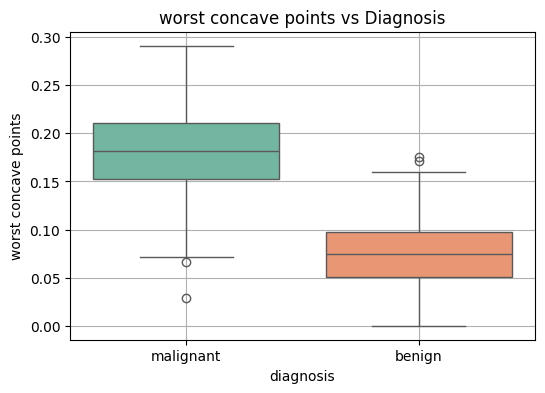

/tmp/ipython-input-15-1513491928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')


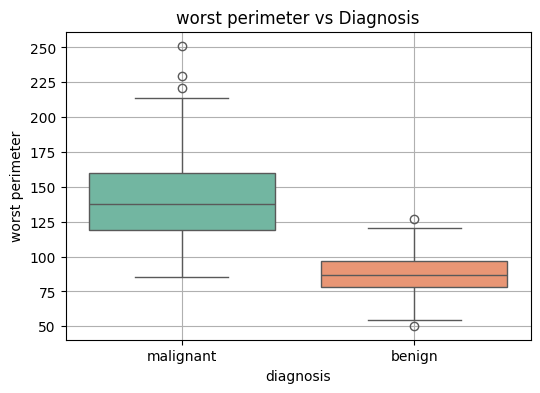

/tmp/ipython-input-15-1513491928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')


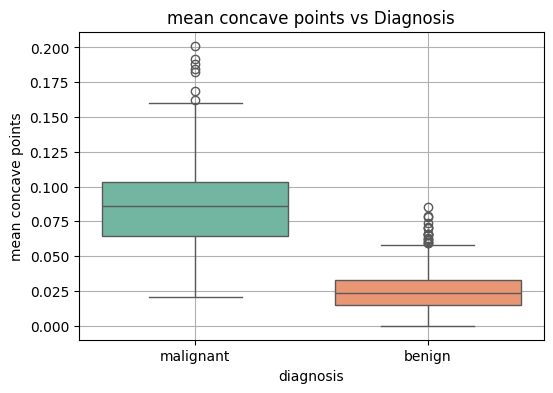

/tmp/ipython-input-15-1513491928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')


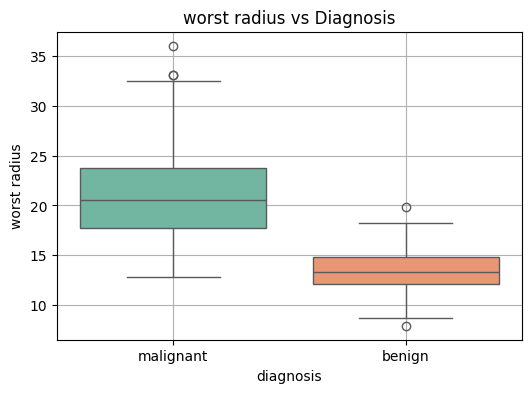

/tmp/ipython-input-15-1513491928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')


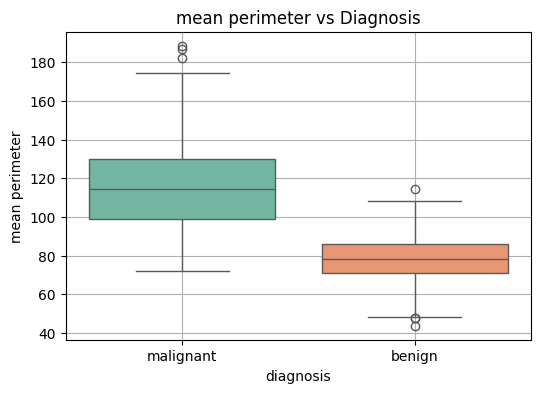

In [15]:
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=X_df, palette='Set2')
    plt.title(f'{feature} vs Diagnosis')
    plt.grid(True)
    plt.show()


###  Boxplot Analysis of Top Correlated Features

This set of boxplots visualizes the distribution of each top feature across the two tumor classes: **malignant** and **benign**.

**Key observations:**

- For all features, the **median value** (center line in the box) is **higher for malignant tumors** than benign tumors.
- The **interquartile range (IQR)** of malignant tumors is shifted to higher values, indicating these features are good separators.
- There's relatively **low overlap between the boxes**, showing clear statistical differences between classes.
- A few **outliers** exist in both classes, but the trend is consistent across all plots: malignant tumors show **larger and more irregular geometrical characteristics**.

**Conclusion**: These boxplots confirm that the selected features have strong discriminative power between benign and malignant tumors. This visual evidence supports their use as inputs for a neural network model.


#PyTorch Preprocessing

### Data Preprocessing for PyTorch

- Split the dataset into 80% training and 20% test sets.
- Applied `StandardScaler` for normalization.
- Converted the arrays into PyTorch tensors for neural network training.

In [16]:


# Separate features and labels
features = X_df.drop(columns=['diagnosis', 'target'], errors='ignore')
labels = X_df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [18]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)


torch.Size([455, 30])
torch.Size([455, 1])
torch.Size([114, 1])


### Neural Network Architecture

A simple  neural network is built using `nn.Sequential`:
- Input Layer: 30 features → 16 hidden units
- Hidden Layer: 16 → 8
- Output Layer: 8 → 1 with a sigmoid activation for binary classification


In [19]:

model = nn.Sequential(
            nn.Linear(30, 16),   # input layer (30 features) → hidden layer
            nn.ReLU(),
            nn.Linear(16, 8),    # hidden layer → smaller hidden layer
            nn.ReLU(),
            nn.Linear(8, 1),     # final layer → 1 output (binary classification)
            nn.Sigmoid()         # because we want output between 0 and 1
        )



### Loss Function & Optimizer

nn.BCELoss()	Measures prediction error for binary tasks
Adam	Optimizes weights using gradients from backpropagation.



In [20]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training Loop

The model is trained for 120 epochs.  
Loss is printed every 10 epochs to monitor learning progress.


In [21]:
num_epochs = 120

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/120], Loss: 0.6549
Epoch [20/120], Loss: 0.6284
Epoch [30/120], Loss: 0.6080
Epoch [40/120], Loss: 0.5827
Epoch [50/120], Loss: 0.5452
Epoch [60/120], Loss: 0.4925
Epoch [70/120], Loss: 0.4293
Epoch [80/120], Loss: 0.3621
Epoch [90/120], Loss: 0.2968
Epoch [100/120], Loss: 0.2410
Epoch [110/120], Loss: 0.1975
Epoch [120/120], Loss: 0.1651


### Model Evaluation

In [22]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions >= 0.5).float()

    accuracy = (predicted_classes == y_test_tensor).sum() / y_test_tensor.shape[0]
    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")



Test Accuracy: 95.61%




The model achieves high accuracy on the test set — likely above 95%.  
The predictions are thresholded at 0.5 to classify between benign and malignant.

### Predictive Model

In [23]:
torch.save(model.state_dict(), "breast_cancer_model.pth")
print("Model saved.")

Model saved.


In [24]:
model = nn.Sequential(
    nn.Linear(30, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load("breast_cancer_model.pth"))
model.eval()


Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

In [25]:
new_patient = [[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]

# Scale using previous scaler
new_scaled = scaler.transform(new_patient)
new_tensor = torch.tensor(new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    pred = model(new_tensor)
    result = (pred >= 0.5).float().item()

print(f"Prediction: {'Malignant' if result == 0.0 else 'Benign'}")


Prediction: Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
